In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Birth-death process

In [27]:
production = 20
degradation = 2

In [28]:
n_reactions = 2

reactions = np.array(
    [[1],[-1]]
)

reaction_rates = np.array([production,degradation])

In [29]:
N = 400
SIMULATION_TIME = 10

simulations = []
delta_ts = []

for n in range(N):
    t = 0

    concentration = 0

    simulation = [t,concentration]

    while t<SIMULATION_TIME:

        propensities = np.array([1,concentration])*reaction_rates
        delta_t = -np.log(1-np.random.random())/sum(propensities) 
        #print(propensities)
        chosen_r = np.random.choice(range(n_reactions), p=propensities/sum(propensities) )
        concentration += int(reactions[chosen_r])
        t += delta_t
        simulation += [t,concentration]
        #print(t,concentration)
        delta_ts.append(delta_t)

    simulations.append(np.array(simulation).reshape(-1,2))
    

[Text(0,0.5,'concentration'), Text(0.5,0,'time')]

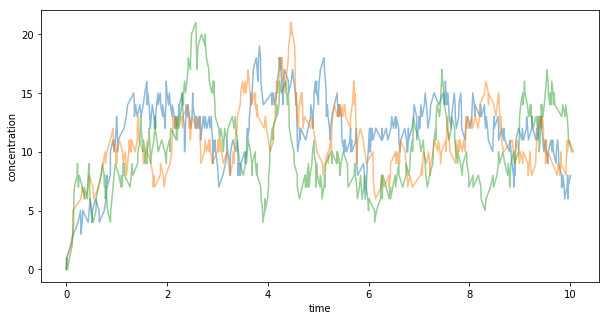

In [30]:
times = np.linspace(0,SIMULATION_TIME,100)
#average_concentrations = reaction_rates[0]/reaction_rates[1]*(1.0-np.exp(-reaction_rates[1]*times))

fig, ax = plt.subplots(figsize=(10,5))

for sim in simulations[1:4]:
    ax.plot(sim[:,0],sim[:,1],alpha=0.5)
ax.set(xlabel='time',ylabel='concentration')

## Steady state distribution 

(0, 30)

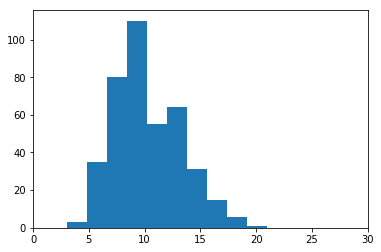

In [31]:
last_data = []
for sim in simulations:
    last_data.append(sim[-1,1])

fig, ax = plt.subplots()
ax.hist(last_data,bins=10)
ax.set_xlim([0,30])

In [32]:
np.mean(last_data), np.std(last_data)

(10.202500000000001, 2.9438909201938852)